In [693]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
import tensorflow as tf

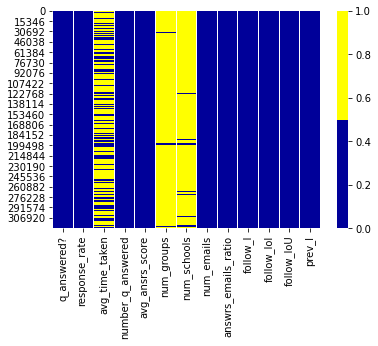

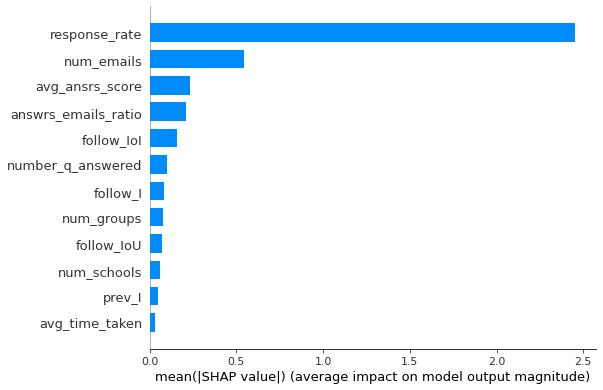

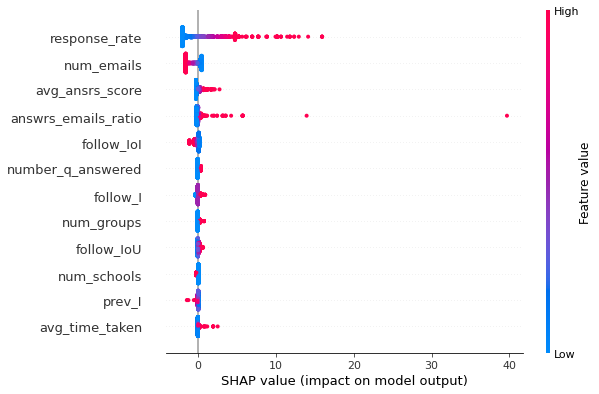

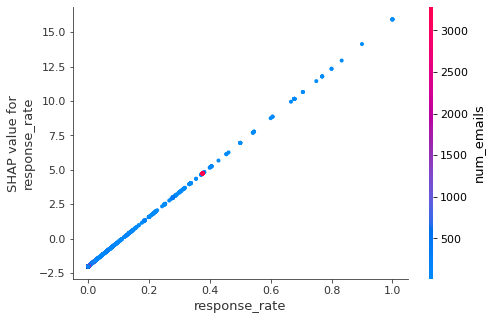

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
238/238 [==============================] - 0s 1ms/step - loss: 2.1104 - accuracy: 0.7817
Epoch 2/100
238/238 [==============================] - 0s 954us/step - loss: 0.4985 - accuracy: 0.8467
Epoch 3/100
238/238 [=============================

238/238 [==============================] - 0s 820us/step - loss: 0.2936 - accuracy: 0.8693
Epoch 72/100
238/238 [==============================] - 0s 680us/step - loss: 0.2923 - accuracy: 0.8708
Epoch 73/100
238/238 [==============================] - 0s 657us/step - loss: 0.2959 - accuracy: 0.8692
Epoch 74/100
238/238 [==============================] - 0s 741us/step - loss: 0.2956 - accuracy: 0.8676
Epoch 75/100
238/238 [==============================] - 0s 696us/step - loss: 0.3131 - accuracy: 0.8705
Epoch 76/100
238/238 [==============================] - 0s 720us/step - loss: 0.2948 - accuracy: 0.8671
Epoch 77/100
238/238 [==============================] - 0s 628us/step - loss: 0.2940 - accuracy: 0.8625
Epoch 78/100
238/238 [==============================] - 0s 610us/step - loss: 0.2975 - accuracy: 0.8621
Epoch 79/100
238/238 [==============================] - 0s 667us/step - loss: 0.2933 - accuracy: 0.8686
Epoch 80/100
238/238 [==============================] - 0s 650us/step - loss:

In [886]:
%run Data_prep_and_model.ipynb

In [659]:
q_timestamps_series = pd.to_datetime(questions.questions_date_added)
q_timestamps_series.sort_values(inplace=True)
q_timestamps_series

6784    2011-09-27 15:23:17+00:00
7937    2011-09-27 15:23:54+00:00
21892   2011-09-27 15:24:27+00:00
5278    2011-09-27 15:24:52+00:00
19021   2011-09-27 15:26:19+00:00
                   ...           
4342    2019-01-31 19:25:15+00:00
5096    2019-01-31 19:26:27+00:00
124     2019-01-31 19:30:12+00:00
8534    2019-01-31 21:05:44+00:00
9858    2019-01-31 22:32:00+00:00
Name: questions_date_added, Length: 23931, dtype: datetime64[ns, UTC]

In [660]:
q_ts_series_recent = q_timestamps_series[q_timestamps_series>pd.Timestamp('2015-12-31 23:59:59.999').tz_localize('UTC')]


In [661]:
month_day_pairs = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

q_timestamps = {2011:{},2012:{},2013:{},2014:{},2015:{},2016:{},2017:{},2018:{},2019:{}}
for year in range(2011,2020):
    max_timestamp = pd.Timestamp('{}-12-31 23:59:59.999'.format(year)).tz_localize('UTC')
    min_timestamp = pd.Timestamp('{}-12-31 23:59:59.999'.format(year-1)).tz_localize('UTC')
    full_year = q_timestamps_series[q_timestamps_series < max_timestamp][q_timestamps_series>min_timestamp]
    for month in range(1,13):
        max_ts = pd.Timestamp('{}-{}-{} 23:59:59.999'.format(year,month,month_day_pairs[month])).tz_localize('UTC')
        min_timestamp = pd.Timestamp('{}-{}-{} 00:00:00.00'.format(year,month,1)).tz_localize('UTC')
        if list(full_year[full_year < max_ts][full_year > min_timestamp]): 
            q_timestamps[year][month] = full_year[full_year < max_ts][full_year > min_timestamp]
        else:
            q_timestamps[year][month] = []

In [671]:
waiting_times = {2011:{},2012:{},2013:{},2014:{},2015:{},2016:{},2017:{},2018:{},2019:{}}
for year in range(2011,2020):
    for month in range(1,13):
        if len(list(q_timestamps[year][month]))>1:
            waiting_times[year][month] = pd.Series(np.ediff1d(q_timestamps[year][month])).dt.total_seconds()/60
        else:
            waiting_times[year][month] = []

No handles with labels found to put in legend.


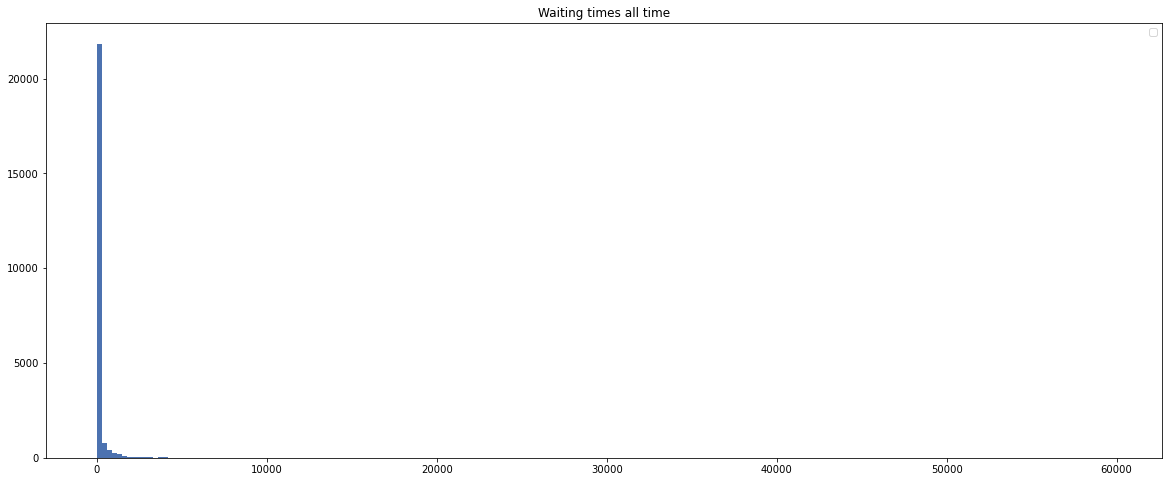

In [672]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,8))
plt.hist(all_waiting_times, bins = 200)
plt.legend(loc='upper right')
plt.title('Waiting times all time'.format(mo))
plt.show()

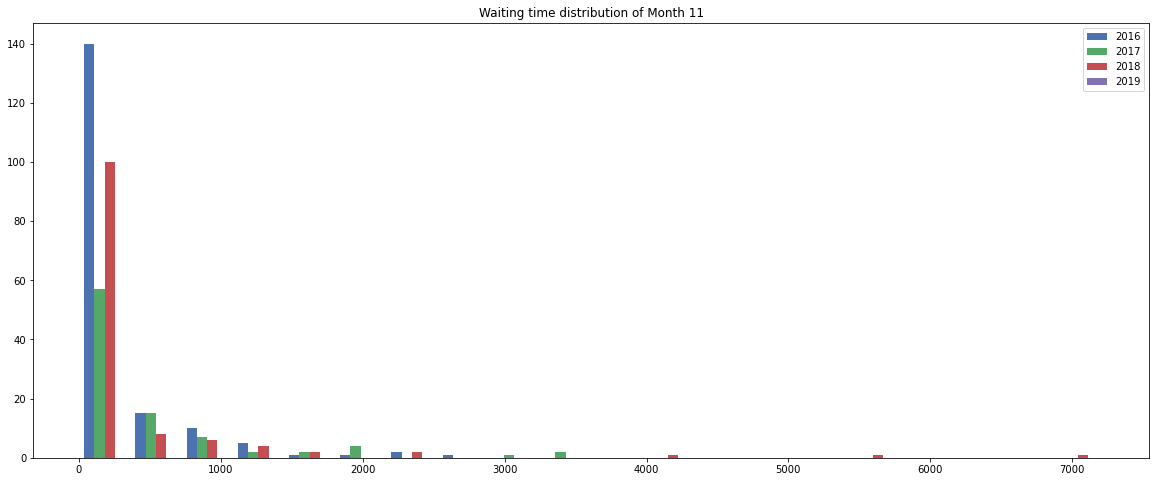

In [673]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

mo = 11
# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,8))
plt.hist([waiting_times[year][mo] for year in range(2016,2020)], bins = 20,label=list(range(2016,2020)))
plt.legend(loc='upper right')
plt.title('Waiting time distribution of Month {}'.format(mo))
plt.show()

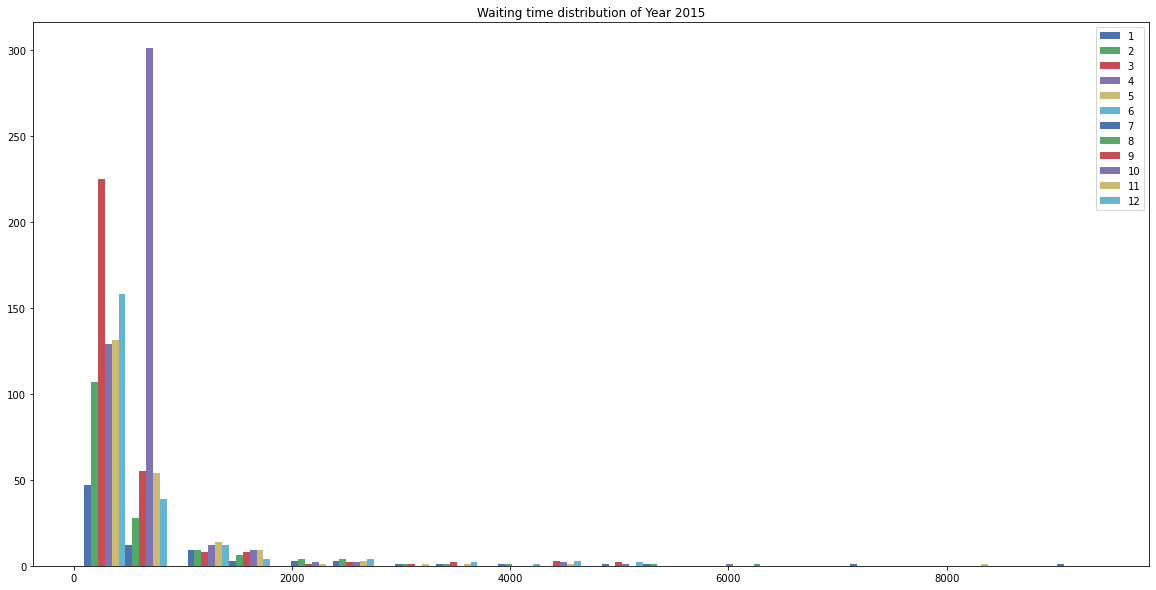

In [674]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

ye = 2015
# bins = np.linspace(0, 1000, 30)
plt.figure(figsize=(20,10))
plt.hist([waiting_times[ye][month] for month in range(1,13)], 10, label=list(range(1,13)))
plt.legend(loc='upper right')
plt.title('Waiting time distribution of Year {}'.format(ye))
plt.show()

In [675]:
questions_per_year = []
for key in q_timestamps_yearly:
    questions_per_year.append(len(q_timestamps_yearly[key]))
print(questions_per_year)

[29, 435, 157, 1007, 1466, 9281, 3255, 7994, 307]


(array([1163., 1129., 1033.,  975.,  862.,  655.,  573.,  340.,  268.,
         265.,  290.,  293.,  354.,  775., 1016., 1125., 1223., 1251.,
        1344., 1446., 1252., 1114., 1016., 1075.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

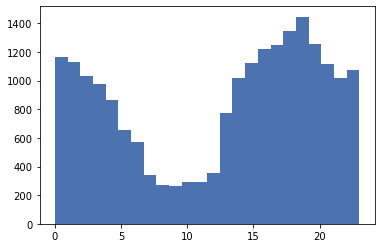

In [676]:
plt.hist(q_ts_series_recent.dt.hour, bins =24)

### Modeling waiting times between question postings

In [677]:
wt_recent = {
    1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]
}

for month in range(1,13):
    wt_month = []
    for year in range(2016,2020):
        wt_month += list(waiting_times[year][month])
    wt_recent[month] = wt_month

4625


(array([188., 491., 210., 420., 555., 808., 623., 590., 594., 146.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

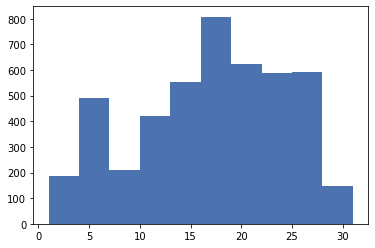

In [678]:
ye1 = 2016
mo1 = 5
ts_range = (
    pd.Timestamp('{}-{}-{} 00:00:00.000'.format(ye1,mo1,1)).tz_localize('UTC'),
    pd.Timestamp('{}-{}-{} 23:59:59.999'.format(ye1,mo1,month_day_pairs[mo1])).tz_localize('UTC')
           )

month_timestamps = q_timestamps_series[q_timestamps_series > ts_range[0]][q_timestamps_series < ts_range[1]]
month_timestamps_days = month_timestamps.dt.day
print(len(month_timestamps_days))
plt.hist(month_timestamps_days)

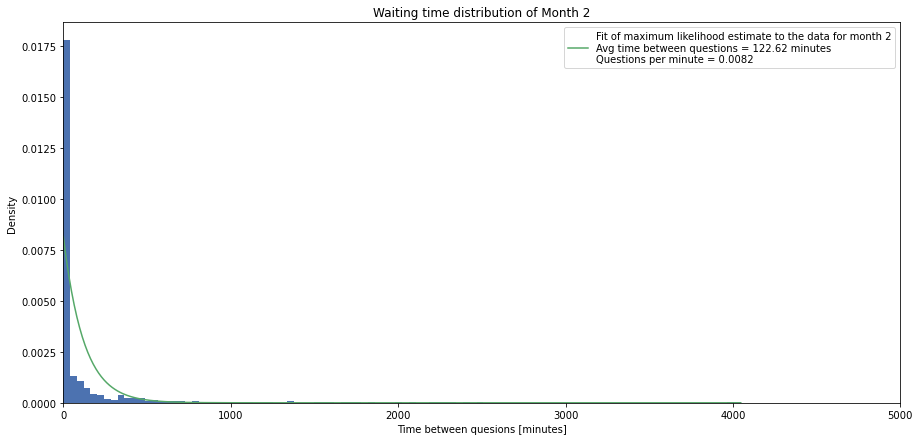

In [679]:
plt.style.use('seaborn-deep')
mo = 2

lambda_ = 1 / np.mean(wt_recent[mo])
distribution = sts.expon(scale=1/lambda_)

# max_bins = 10000
# bins = np.linspace(0, max_bins, 30)
plt.figure(figsize=(15,7))
plt.hist(wt_recent[mo], 100, density=1)
x = np.linspace(0, max(wt_recent[mo]), 500)
y = distribution.pdf(x)
plt.plot(x, y, label = f'Fit of maximum likelihood estimate to the data for month {mo}\nAvg time between questions = {round(1/lambda_,2)} minutes\nQuestions per minute = {round(lambda_,4)}')
plt.xlabel('Time between quesions [minutes]')
plt.ylabel('Density')
plt.title('Waiting time distribution of Month {}'.format(mo))
plt.xlim([0,5000])
plt.legend()
plt.show()

In [680]:
means = []
for mon in range(1,13):
    means.append(1/np.mean(wt_recent[mon]))
    

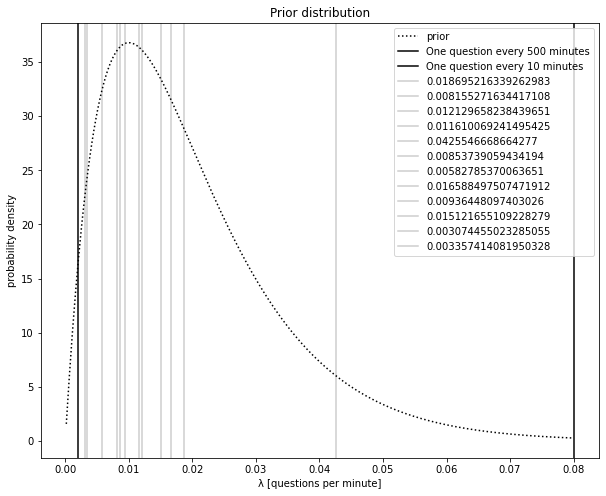

In [681]:
def prior(alpha, beta, lambda_):
    return sts.gamma(alpha, scale=beta).pdf(lambda_)

# PLOT THE PRIOR
alpha = 2
beta = 1/100

lambdas = np.linspace(0, 0.08, 501)[1:]
plt.figure(figsize=(10, 8))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.axvline(x=0.002, color = 'black', label = 'One question every 500 minutes')
plt.axvline(x=0.08, color = 'black', label = 'One question every 10 minutes')
for mean in means:
    plt.axvline(x=mean, color = 'black', label = '{}'.format(mean),alpha=0.2)
plt.xlabel('λ [questions per minute]')
plt.ylabel('probability density')
plt.title(f'Prior distribution')
plt.legend()
plt.show()

In [682]:
# DEFINE THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

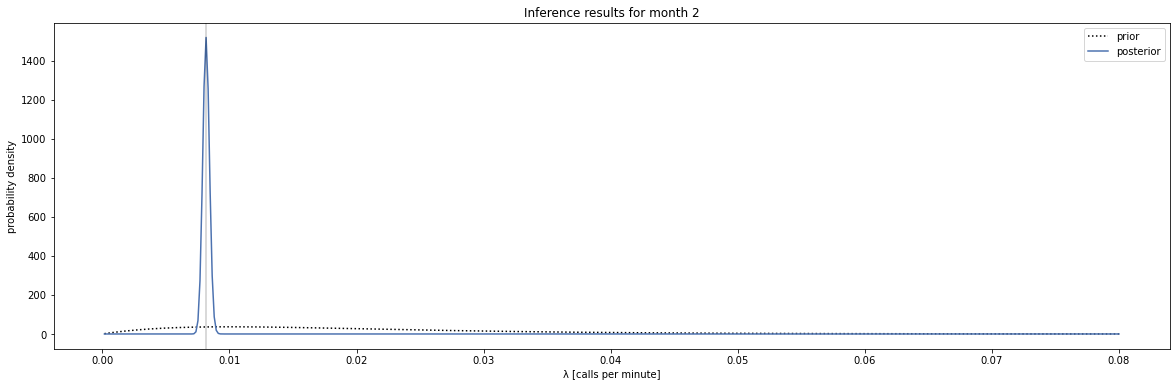

In [683]:
# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(alpha,beta,parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

posterior = compute_posterior(lambdas, prior, likelihood, wt_recent[mo])

# YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
plt.figure(figsize=(20, 6))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.axvline(x=means[mo-1], alpha=0.2, color = 'black')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for month {mo}')
plt.legend()
plt.show()

In [684]:
def analytical_posterior(x,alpha,beta,data):
    alpha1 = alpha+len(data)
    beta1 = 1/beta+np.sum(data)
    return sts.gamma(alpha1,scale=1/beta1).pdf(x)

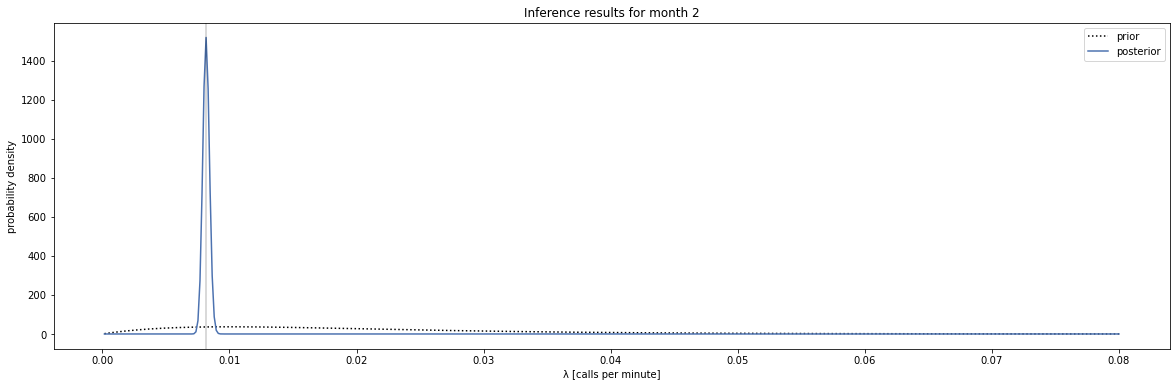

In [685]:
posterior = analytical_posterior(lambdas, alpha,beta, wt_recent[mo])

plt.figure(figsize=(20, 6))
plt.plot(lambdas, prior(alpha,beta,lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.axvline(x=means[mo-1], alpha=0.2, color = 'black')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for month {mo}')
plt.legend()
plt.show()

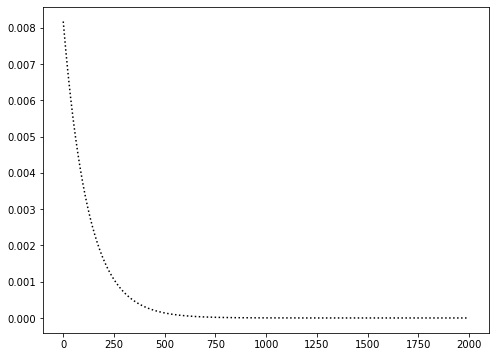

In [686]:
def posterior_predictive(x,alpha,beta,data):
    return sts.lomax.pdf(x, c = alpha+len(data), scale = beta+np.sum(data))

x = np.linspace(0,2000,1000)
plt.figure(figsize=(8, 6))
plt.plot(x, analytical_posterior_predictive(x,2,1/100,wt_recent[mo]), color='black', linestyle=':', label='posterior predictive')


In [687]:
def posterior_predictive_rvs(alpha,beta,data,size=1):
    return sts.lomax(c = alpha+len(data), scale = beta+np.sum(data)).rvs(size=size) if size>1 else sts.lomax(c = alpha+len(data), scale = beta+np.sum(data)).rvs()

In [731]:
from IPython.display import display, HTML

In [740]:
i = 0
for prof_id in professionals.professionals_id:
    
    i+=1
    if i < 4:
        print(prof_id in list(model_dataset1.professional_id))
        display(HTML(model_dataset1[model_dataset1.professional_id==prof_id].drop(columns = ['prev_q_tags']).head(5).to_html()))

False


,professional_id,emails_frequency_level,question_id,q_answered?,q_tags,response_rate,avg_time_taken,number_q_answered,following_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I


False


,professional_id,emails_frequency_level,question_id,q_answered?,q_tags,response_rate,avg_time_taken,number_q_answered,following_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I


True


,professional_id,emails_frequency_level,question_id,q_answered?,q_tags,response_rate,avg_time_taken,number_q_answered,following_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,b551946952ae4328864414a9164a95d8,0,"[guidance-counselor, school-counselor, school, education, school-counseling]",0.0,NaT,39.0,"[career-choice, education, consulting, google, air-force]",1.974359,NaN,NaN,70.0,0.557143,1,0.2,0.100000,5
1,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,fc672127796b4a7cb82ee6b1f988ad16,0,"[university, computer, colleges, education, courses]",0.0,NaT,39.0,"[career-choice, education, consulting, google, air-force]",1.974359,NaN,NaN,70.0,0.557143,1,0.2,0.100000,5
2,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,6fe604f0ec464a79b24ba24ff64c0bde,0,"[teach-for-america, education]",0.0,NaT,39.0,"[career-choice, education, consulting, google, air-force]",1.974359,NaN,NaN,70.0,0.557143,1,0.2,0.142857,2
3,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,5f0a810c890d4b6aaa600a4a2aae0537,0,[education],0.0,NaT,39.0,"[career-choice, education, consulting, google, air-force]",1.974359,NaN,NaN,70.0,0.557143,1,0.2,0.166667,1
4,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,f11c9d301c594bc798007d2645f04a30,0,"[teaching, education]",0.0,NaT,39.0,"[career-choice, education, consulting, google, air-force]",1.974359,NaN,NaN,70.0,0.557143,1,0.2,0.142857,2


In [809]:
notification_preferences = pd.merge(professionals,emails,how = 'left', left_on = ['professionals_id'], right_on = ['emails_recipient_id'])
notification_preferences = notification_preferences.drop_duplicates(subset='professionals_id', keep="last")[['professionals_id','emails_frequency_level']]
notification_preferences

,professionals_id,emails_frequency_level
0,9ced4ce7519049c0944147afb75a8ce3,NaN
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN
379,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate
380,977428d851b24183b223be0eb8619a8c,NaN
381,e2d57e5041a44f489288397c9904c2b2,NaN
...,...,...
1856080,9f267950ab8e43e2afcf564327049297,NaN
1856081,4a7e1e5dd884488da283e1cab6ad11e0,NaN
1856082,ea75c5fce38348e0a151c3c346929e6a,NaN
1856083,34f6222c3c02480ca2df8a3e4ba878d0,NaN


In [969]:
emails

,Unnamed: 0,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily
...,...,...,...,...,...
925046,1850096,2409293,de40a9dc047c4cf3acdf9756af10462c,2019-01-31 23:01:21 UTC+0000,email_notification_daily
925047,1850097,2409400,eee7985edfc64e0494b1424fed2136b8,2019-01-31 23:07:25 UTC+0000,email_notification_daily
925048,1850098,2409811,d6eec2d641424aa8ac2875c701c3b168,2019-01-31 23:31:47 UTC+0000,email_notification_daily
925049,1850099,2409736,7dd5060696844838ba4fbad3246a6d3e,2019-01-31 23:26:51 UTC+0000,email_notification_daily


In [970]:
not_pref = pd.merge(professionals, emails, how = 'left', left_on = 'professionals_id', right_on = 'emails_recipient_id')

In [976]:
not_pref.drop_duplicates(subset = 'professionals_id', keep = 'last', inplace =True)

In [ ]:
alpha_beta_posteriors = {}
for month in range(1,13):
    alpha_beta_posteriors[month] = (len(wt_recent[month])+alpha,np.sum(wt_recent[month])+beta)
    
def post_pred_rvs(month,size=1):
    alpha_, beta_ = alpha_beta_posteriors[month]
    if size == 1:
        return sts.lomax(c=alpha_, scale = beta_).rvs()
    else:
        return sts.lomax(c=alpha_, scale = beta_).rvs(size=size)

In [1053]:
#generating timestamps:
timestamps = []
current_time = datetime.datetime(2020, 1, 1, 0, 0, 0, 0)
while current_time.year == 2020:
    wait_time = post_pred_rvs(current_time.month)
    next_ts = current_time + datetime.timedelta(0,wait_time*60)
    current_time = next_ts
    timestamps.append(next_ts)

In [1059]:
simulated_dataset = pd.DataFrame(columns = model_dataset.columns)
simulated_dataset['time_answered'] = []
simulated_dataset['time_posted'] = timestamps

In [1061]:
simulated_dataset.head(3)

,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I,time_answered,time_posted
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 01:18:21.282203
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 01:38:06.781103
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 02:18:32.368409


In [1062]:
model_dataset

,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
1,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
2,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
3,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.166667,1
4,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322250,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322251,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322252,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322253,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.021277,6


In [1064]:
questions.shape[0]*professionals.shape[0]

673705512

In [1065]:
6000*professionals.shape[0]

168912000

In [1071]:
prof_df = model_dataset1.drop_duplicates(subset = 'professional_id')
prof_df

,professional_id,emails_frequency_level,question_id,q_answered?,q_tags,response_rate,avg_time_taken,number_q_answered,following_tags,prev_q_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate,b551946952ae4328864414a9164a95d8,0,"[guidance-counselor, school-counselor, school,...",0.000000,NaT,39.0,"[career-choice, education, consulting, google,...","[career-details, airline-industry, dean, child...",1.974359,NaN,NaN,70.0,0.557143,1,0.20000,0.100000,5
70,102fb92c28034ad988b593d0111cb4bb,email_notification_immediate,1f2982c98eab483a92cfca6b60d8ffcf,0,Na,0.000000,NaT,0.0,[design],"[beginner, architecture, environment, doctor, ...",0.000000,NaN,NaN,38.0,0.000000,0,0.00000,0.000000,0
108,5a4a16842ec64430ac3f916aacf35fe1,email_notification_immediate,ea4e7e91a86343239f589a3187b0ef93,0,"[civil-engineering, architecture, degrees, arc...",0.000000,NaT,1.0,[architecture],"[architecture, environment, surveying, doctor,...",2.000000,NaN,NaN,19.0,0.052632,1,1.00000,0.166667,5
127,81999d5ad93549dab55636a545e84f2a,email_notification_immediate,de374d86ec0e496ea571b636bd683b16,0,"[airline-industry, aviation, pilot, air-force,...",0.000000,NaT,3.0,[aviation],"[commercial-aviation, airline-industry, histor...",2.333333,NaN,NaN,11.0,0.272727,1,1.00000,0.166667,5
138,7d425e8d7cfb4fe7b0702fff4d6d84e7,email_notification_immediate,97db65f3bbe44856b07dad91b5516c9e,0,"[philanthropy, sociology, psychology, educatio...",0.080808,09:07:59,43.0,"[political-science, teaching, teacher, politic...","[architecture, career-details, airline-industr...",1.697674,NaN,NaN,198.0,0.217172,1,0.20000,0.076923,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322136,68b68dd2e2cb4d72aaf0dd2aca9091ba,email_notification_immediate,6e4f9820deda446eb487f54511d01cd2,0,"[college-advice, money, finance, college, guid...",0.000000,NaT,0.0,"[college-bound, college-admissions, college-ad...","[college-bound, financial-aid, student, financ...",0.000000,NaN,2.0,8.0,0.000000,1,0.20000,0.100000,5
322144,d3ef2acc4b6c4a6facfec4cf72453110,email_notification_immediate,0ccf6d44a42a48baade470ae7487c439,0,"[medicine, healthcare, doctor, physician, premed]",0.000000,NaT,0.0,"[premed, dentist, dentalschool, dentistry, col...","[medical, medicine, premed, physician, doctor,...",0.000000,NaN,3.0,6.0,0.000000,1,0.20000,0.100000,5
322150,ef090fcc6d34434986ee59e2451b1f96,email_notification_immediate,81fe26c0f4214d70b1c0875f3a4720a0,0,"[lawyer, law, college, law-school]",0.021277,06:54:29,2.0,"[counseling, higher-education, admissions, fin...","[work-environment, airline-industry, child-psy...",0.000000,NaN,NaN,47.0,0.042553,1,0.20000,0.111111,4
322197,8ab0430102544ff293c575979824fcf4,email_notification_immediate,f0d9831230b248958ac406ba0eb4eee6,0,[management],0.000000,NaT,1.0,"[project-planning, sales, merchandising, train...","[entrepreneur, medicine, stockmarket, agent, d...",0.000000,NaN,NaN,5.0,0.200000,1,0.10000,0.090909,1


In [1056]:
def match_question(x):
    for prof in model_dataset.professionals_id.drop_duplicates():
        prof_features = model_dataset[model_dataset.]
        model.predict()


ValueError: Length of values does not match length of index

In [1043]:
post_pred_rvs()

KeyError: 5000

In [1032]:
alpha_beta_posteriors = {}
for month in range(1,13):
    alpha_beta_posteriors[month] = (len(wt_recent[month])+alpha,np.sum(wt_recent[month])+beta)
    
def post_pred_rvs(month,size=1):
    alpha_, beta_ = alpha_beta_posteriors[month]
    if size == 1:
        return sts.lomax(c=alpha_, scale = beta_).rvs()
    else:
        return sts.lomax(c=alpha_, scale = beta_).rvs(size=size)
    
class Simulation:
    def __init__(self, threshold =0.6):
        self.time = datetime.datetime.now()
        self.email_threshold = threshold
        self.q_counter = 0
        
        self.questions = {}
        self.q_email_counter = {}

        self.pending_emails_immediate = {}
        self.pending_emails_daily = {}
        self.pending_emails_weekly = {}
        self.pending_emails = {}
        self.sent_emails = {}
        


    def generate_question_timestamp(self):
        current_month = self.time.month
        wait_time = post_pred_rvs(current_month)
        timestamp = self.time+datetime.timedelta(0,wait_time*60)
        
    def next_question(self, timestamp):
        #generating question
        
        q_id = self.q_counter #new_question_id
        self.questions[q_id] = {'tstamp_question': timestamp, 'tstamp_answer': False}
        self.q_email_counter[q_id]=0
        self.q_counter+=1
        for prof_id in professionals.professionals_id:
            if prof_id in list(model_dataset1.professional_id):
                prof_features = model_dataset[model_dataset1.professional_id == prof_id][['response_rate','avg_time_taken', 'number_q_answered','avg_ansrs_score','num_groups', 'num_schools','num_emails','answrs_emails_ratio']].iloc[0,:]
#                 prof_tags = model_datasetasfadf1
                # q_tags = #### randomly generate questions tags
                input_features = prof_features
                input_features['follow_I'] = 1
                input_features['follow_IoI'] = 0.2
                input_features['follow_IoU'] = 0.1
                input_features['prev_I'] = 5
                input_features_df = pd.DataFrame(columns = x_train.columns)
                input_features_df.loc[0] = list(input_features)
        
                prob = model.predict_proba(input_features_df)
                if prob > self.email_threshold:
                    self.q_email_counter[q_id]+=1
                    if prof_id in self.pending_emails:
                        self.pending_emails[prof_id].append((q_id,prob))
                    else:
                        self.pending_emails[prof_id] = [(q_id,prob)]
                    
                    #add email to pending emails for that professional

                    pref = not_pref[not_pref.professionals_id == prof_id].emails_frequency_level.values[0]

                    if  pref == 'email_notification_immediate':
                        if prof_id in self.pending_emails_immediate:
                            self.pending_emails_immediate[prof_id].append((q_id,prob))
                        else:
                            self.pending_emails_immediate[prof_id] = [(q_id,prob)]
                        
                    if  pref == 'email_notification_daily':
                        if prof_id in self.pending_emails_daily:
                            self.pending_emails_daily[prof_id].append((q_id,prob))
                        else:
                            self.pending_emails_daily[prof_id] = [(q_id,prob)]
                            
                    if  pref == 'email_notification_weekly':
                        if prof_id in self.pending_emails_weekly:
                            self.pending_emails_weekly[prof_id].append((q_id,prob))
                        else:
                            self.pending_emails_weekly[prof_id] = [(q_id,prob)]
                        
        
    def immediate_emails(self):
        while self.pending_emails_immediate:
            next_prof = list(self.pending_emails_immediate.keys())[0]
            next_q = self.pending_emails_immediate.pop(next_prof)
            
            #send email
            if next_prof in self.sent_emails:
                self.sent_emails[next_prof] = (q_id,self.time)
            
            #reply to question with p given by the model
            if np.random.random() < next_q[1]:
                avg_time_taken = np.mean(model_dataset[model_dataset1.professional_id == next_prof]['avg_time_taken'])
                time_to_respond = sts.norm(avg_time_taken,5).rvs().clip(min=0.5)
                ttr_seconds = time_to_respond*3600
                current_ts = self.questions[next_q]['tstamp_answer']
                if current_ts:
                    self.questions[next_q]['tstamp_answer'] = min(current_ts,self.time+datetime.timedelta(0,ttr_seconds))
        
        
        

In [1033]:
x = datetime.datetime.now()
sim = Simulation(0.6)
print(datetime.datetime.now()-x)

0:00:00.000167


In [1034]:
ts = sim.generate_question_timestamp()
sim.next_question(ts)

KeyboardInterrupt: 

In [1015]:
prefi = not_pref[not_pref.professionals_id == '0c673e046d824ec0ad0ebe012a0673e4'].emails_frequency_level.values[0]
prefi

'email_notification_immediate'

In [1012]:
prefi == 'email_notification_immediate'

379    True
Name: emails_frequency_level, dtype: bool

In [960]:
prof_features = model_dataset1[model_dataset1.professional_id == '0c673e046d824ec0ad0ebe012a0673e4' ][['response_rate','avg_time_taken', 'number_q_answered','avg_ansrs_score','num_groups', 'num_schools','num_emails','answrs_emails_ratio']].iloc[0,:]
input_features = prof_features
input_features['follow_I'] = 1
input_features['follow_IoI'] = 0.2
input_features['follow_IoU'] = 0.1
input_features['prev_I'] = 5
input_features_df = pd.DataFrame(columns = x_train.columns)
input_features_df.loc[0] = list(input_features)
input_features_df = input_features_df.fillna(0)

In [959]:
model.predict(input_features_df)

array([[0.81913817]], dtype=float32)

In [ ]:
Sim = Simulation(0.6)
Simulation.generate_question_timestamp()
days_so_far_in_week = 0
for timestep in range(1000):
    if (Simulation.time+timestamp).day > Simulation.time.day:
        Sim.daily_emails()
        days_so_far_in_week +=1
    if days_so_far_in_week > 6:
        days_so_far_in_week = 0
        Sim.weekly_emails()
    ts = Sim.generate_timestamp()
    

In [885]:
model_dataset

,question_id,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,b551946952ae4328864414a9164a95d8,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
1,fc672127796b4a7cb82ee6b1f988ad16,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
2,6fe604f0ec464a79b24ba24ff64c0bde,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
3,5f0a810c890d4b6aaa600a4a2aae0537,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.166667,1
4,f11c9d301c594bc798007d2645f04a30,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322250,d7ca91dd85384e1f918748542d87d2de,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322251,17e06976b5ac4140aa80599bc43fc71c,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322252,556a3322b0df4e25badf8c2cc36407c9,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322253,ea4cfbf5c0134ad2bc67354acb62958e,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.021277,6


In [884]:
features = model_dataset1[model_dataset1.professional_id == '0c673e046d824ec0ad0ebe012a0673e4'][['q_answered?','response_rate','avg_time_taken', 'number_q_answered','avg_ansrs_score','num_groups', 'num_schools','num_emails','answrs_emails_ratio']].iloc[0,:]

In [883]:
features[]

q_answered?                   0
response_rate                 0
avg_time_taken              NaT
number_q_answered            39
avg_ansrs_score         1.97436
num_groups                  NaN
num_schools                 NaN
num_emails                   70
answrs_emails_ratio    0.557143
high                          1
Name: 0, dtype: object

In [874]:
(sts.norm(1,2).rvs()).clip(min=0)

1.5977409940550888

In [872]:
np.max(model_dataset.avg_time_taken)

12390.666666666666

In [839]:
np.mean(model_dataset[model_dataset1.professional_id == '0c673e046d824ec0ad0ebe012a0673e4']['avg_time_taken'])

0     11.692668
1     11.692668
2     11.692668
3     11.692668
4     11.692668
        ...    
65    11.692668
66    11.692668
67    11.692668
68    11.692668
69    11.692668
Name: avg_time_taken, Length: 70, dtype: float64

(array([2.55180e+04, 2.63188e+05, 2.94240e+04, 3.52300e+03, 5.19000e+02,
        6.50000e+01, 1.60000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

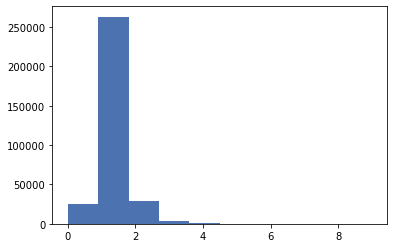

In [717]:
plt.hist(model_dataset.follow_I)

In [752]:
model_dataset1[model_dataset1.emails_frequency_level != 'email_notification_immediate']

,professional_id,emails_frequency_level,question_id,q_answered?,q_tags,response_rate,avg_time_taken,number_q_answered,following_tags,prev_q_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I


In [719]:
model_dataset

,question_id,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,b551946952ae4328864414a9164a95d8,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
1,fc672127796b4a7cb82ee6b1f988ad16,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.100000,5
2,6fe604f0ec464a79b24ba24ff64c0bde,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
3,5f0a810c890d4b6aaa600a4a2aae0537,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.166667,1
4,f11c9d301c594bc798007d2645f04a30,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.20000,0.142857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322250,d7ca91dd85384e1f918748542d87d2de,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322251,17e06976b5ac4140aa80599bc43fc71c,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322252,556a3322b0df4e25badf8c2cc36407c9,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.022727,3
322253,ea4cfbf5c0134ad2bc67354acb62958e,0,0.0,11.692668,3.0,0.000000,0.0,0.0,53.0,0.056604,1,0.02439,0.021277,6


In [708]:
# model_dataset1[model_dataset1.question_id == 'b551946952ae4328864414a9164a95d8']

In [641]:
a = datetime.datetime.now()

In [642]:
a

datetime.datetime(2020, 12, 5, 18, 44, 50, 440959)

In [644]:
a+datetime.timedelta(0,3600)

datetime.datetime(2020, 12, 5, 19, 44, 50, 440959)

In [759]:
emails.emails_frequency_level.unique()

array(['email_notification_daily', 'email_notification_immediate',
       'email_notification_weekly'], dtype=object)

In [803]:
notification_preferences = pd.merge(professionals,emails,how = 'left', left_on = ['professionals_id'], right_on = ['emails_recipient_id'])

In [806]:
notification_preferences = notification_preferences.drop_duplicates(subset='professionals_id', keep="last")[['professionals_id','emails_frequency_level']]

In [808]:
notification_preferences[notification_preferences.emails_frequency_level.notnull()]

,professionals_id,emails_frequency_level
379,0c673e046d824ec0ad0ebe012a0673e4,email_notification_immediate
440,102fb92c28034ad988b593d0111cb4bb,email_notification_immediate
533,5a4a16842ec64430ac3f916aacf35fe1,email_notification_immediate
589,81999d5ad93549dab55636a545e84f2a,email_notification_immediate
996,7d425e8d7cfb4fe7b0702fff4d6d84e7,email_notification_immediate
...,...,...
1856022,de40a9dc047c4cf3acdf9756af10462c,email_notification_daily
1856036,eee7985edfc64e0494b1424fed2136b8,email_notification_daily
1856041,d6eec2d641424aa8ac2875c701c3b168,email_notification_daily
1856044,7dd5060696844838ba4fbad3246a6d3e,email_notification_daily


In [784]:
a = emails.groupby('emails_recipient_id').agg(lambda x: list(x))[['emails_frequency_level']]

In [799]:
for i in range(a.shape[0]):
    x = a.iloc[i,:].emails_frequency_level
    if i<1:
        print(set(x))
        

{'email_notification_immediate', 'email_notification_daily'}


In [1072]:
#generating timestamps:
timestamps = []
current_time = datetime.datetime(2020, 1, 1, 0, 0, 0, 0)
while current_time.year == 2020:
    wait_time = post_pred_rvs(current_time.month)
    next_ts = current_time + datetime.timedelta(0,wait_time*60)
    current_time = next_ts
    timestamps.append(next_ts)

In [1280]:
our_questions = list(full_data['q_tags'])
our_professionals = professionals_dataset[professionals_dataset['following_tags'].notnull()]
our_professionals.loc[:,"num_schools"]=our_professionals["num_schools"].fillna(0)
our_professionals.loc[:,"num_groups"] = our_professionals["num_groups"].fillna(0)
our_professionals.loc[:,"num_emails"] = our_professionals["num_emails"].fillna(0)
our_professionals.loc[:,"avg_time_taken"] = our_professionals["avg_time_taken"].fillna(med)
our_professionals.loc[:,'response_rate'] = our_professionals['response_rate'].fillna(0)
our_professionals.loc[:,'avg_time_taken'] = our_professionals['avg_time_taken'].apply(lambda x: x.total_seconds()/3600 if not type(x) == float else x)
our_professionals.loc[:,'answrs_emails_ratio'] = our_professionals['answrs_emails_ratio'].fillna(0)

In [1281]:

our_professionals

,professional_id,Unnamed: 0_x,Unnamed: 0_y,response_rate,avg_time_taken,number_q_answered,following_tags,prev_q_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio
2,0c673e046d824ec0ad0ebe012a0673e4,329.342857,2.402384e+06,0.000000,11.692668,39.0,"[career-choice, education, consulting, google,...","[career-details, airline-industry, dean, child...",1.974359,0.0,0.0,70.0,0.557143
7,102fb92c28034ad988b593d0111cb4bb,415.210526,2.210786e+06,0.000000,11.692668,0.0,[design],"[beginner, architecture, environment, doctor, ...",0.000000,0.0,0.0,38.0,0.000000
8,5a4a16842ec64430ac3f916aacf35fe1,518.000000,2.060603e+06,0.000000,11.692668,1.0,[architecture],"[architecture, environment, surveying, doctor,...",2.000000,0.0,0.0,19.0,0.052632
9,81999d5ad93549dab55636a545e84f2a,578.000000,2.298258e+06,0.000000,11.692668,3.0,[aviation],"[commercial-aviation, airline-industry, histor...",2.333333,0.0,0.0,11.0,0.272727
10,7d425e8d7cfb4fe7b0702fff4d6d84e7,879.818182,2.506310e+06,0.080808,9.133056,43.0,"[political-science, teaching, teacher, politic...","[architecture, career-details, airline-industr...",1.697674,0.0,0.0,198.0,0.217172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28147,9f267950ab8e43e2afcf564327049297,NaN,NaN,0.000000,11.692668,0.0,[broadcast-media],NaN,0.000000,0.0,0.0,0.0,0.000000
28148,4a7e1e5dd884488da283e1cab6ad11e0,NaN,NaN,0.000000,11.692668,0.0,"[firstnet, #inbuildingsolutions, telecommunica...",NaN,0.000000,0.0,0.0,0.0,0.000000
28149,ea75c5fce38348e0a151c3c346929e6a,NaN,NaN,0.000000,11.692668,0.0,"[computer-software, electrical-engineering, we...",NaN,0.000000,0.0,0.0,0.0,0.000000
28150,34f6222c3c02480ca2df8a3e4ba878d0,NaN,NaN,0.000000,11.692668,0.0,[telecommunications],NaN,0.000000,0.0,0.0,0.0,0.000000


In [1310]:
oqs = [x for x in our_questions if type(x)==list]


In [1313]:
len(our_questions)

322255

In [1312]:
len(oqs)

308351

In [1318]:
import warnings
warnings.filterwarnings('ignore')
import time

threshold = 0.6
def random_answer(x):
    return int(np.random.random()< x)
    
def sample_time(x):
    return x + sts.norm(0,5).rvs()
    
from itertools import cycle, islice 
current_time = datetime.datetime(2020, 1, 1, 0, 0, 0, 0)

questions_sent = []
questions_answered = []
time_taken = []

start = time.time()

for ts in timestamps[:50]:
    random_tags = np.random.choice(oqs)
    def check_intersection(x):
        return bool(len(set(random_tags).intersection(x)))

    new_df = our_professionals[our_professionals.following_tags.apply(check_intersection)]
    new_df["q_tags"] = [random_tags for _ in range(len(new_df))]
    follow_I = new_df.apply(lambda x: Intersection(x.following_tags, x.q_tags), axis=1)
    follow_IoI = new_df.apply(lambda x: IoI(x.following_tags, x.q_tags), axis=1)
    follow_IoU = new_df.apply(lambda x: IoU(x.following_tags, x.q_tags), axis=1)


    new_df.loc[:,"follow_I"]=follow_I
    new_df.loc[:,"follow_IoI"]=follow_IoI
    new_df.loc[:,"follow_IoU"]=follow_IoU
    new_df.loc[:,"prev_I"]=prev_I
    new_df = new_df.drop(columns = ['professional_id', 'Unnamed: 0_x', 'Unnamed: 0_y',
       'following_tags', 'prev_q_tags', 'q_tags'])

    new_df.loc[:,'probs'] = model.predict(new_df).flatten()
    to_answer = new_df[new_df.probs>threshold]
    to_answer.loc[:,'answered?'] = to_answer['probs'].apply(random_answer)
    to_answer.loc[:,'time_taken'] = to_answer['avg_time_taken'].apply(sample_time)
    questions_sent.append(len(to_answer))
    questions_answered.append(np.sum(to_answer['answered?']))
    time_taken.append(min(to_answer[to_answer['answered?'] == 1]['time_taken']))

print(time.time()-start)
print(ts)

22.221160173416138
2020-01-02 21:26:59.759164


In [1220]:
x_train.head(5)

,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
199933,0.376741,166.307868,1710.0,0.252047,1.0,10.0,3280.0,0.521341,2,0.166667,0.100000,8
11613,0.043367,513.309575,25.0,1.320000,0.0,0.0,392.0,0.063776,1,0.052632,0.045455,3
294568,0.381579,10.413458,188.0,0.324468,0.0,0.0,76.0,2.473684,1,0.250000,0.111111,5
225985,1.000000,43.320556,10.0,0.200000,0.0,0.0,1.0,10.000000,1,1.000000,0.111111,8
187131,0.000000,11.692668,0.0,0.000000,0.0,0.0,301.0,0.000000,1,0.029412,0.027027,3


In [1229]:
new_df.head(5)

,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
21,0.000000,11.6927,0.0,0.0,0.0,0.0,49.0,0.000000,1,0.500000,0.166667,0
45,0.000000,11.6927,1.0,2.0,0.0,0.0,94.0,0.010638,1,0.250000,0.125000,5
230,0.000000,11.6927,1.0,1.0,0.0,0.0,77.0,0.012987,1,0.500000,0.166667,4
310,0.000000,11.6927,2.0,2.0,0.0,0.0,319.0,0.006270,1,0.100000,0.071429,0
322,0.016393,1 days 20:52:00,6.0,1.0,0.0,0.0,61.0,0.098361,1,0.142857,0.090909,5


In [1078]:
np.random.choice(our_questions)

['degrees', 'math', 'creative-writing', 'majors']

In [1079]:
model_dataset.head()

,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I
0,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.2,0.100000,5
1,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.2,0.100000,5
2,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.2,0.142857,2
3,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.2,0.166667,1
4,0,0.0,11.692668,39.0,1.974359,0.0,0.0,70.0,0.557143,1,0.2,0.142857,2


In [1080]:
new = pd.DataFrame(columns = model_dataset.columns)

In [1081]:
new

,q_answered?,response_rate,avg_time_taken,number_q_answered,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio,follow_I,follow_IoI,follow_IoU,prev_I


In [1107]:
our_professionals = professionals_dataset[professionals_dataset['following_tags'].notnull()]

In [1085]:
professionals_dataset.head(2)

,professional_id,Unnamed: 0_x,Unnamed: 0_y,response_rate,avg_time_taken,number_q_answered,following_tags,prev_q_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,NaT,1.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,NaT,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [1105]:
random_tags = np.random.choice(our_questions)
def check_intersection(x, random_tags):
    return bool(len(set(random_tags).intersection(x)))

In [1106]:
our_professionals[our_professionals.following_tags.apply(check_intersection)]

,professional_id,Unnamed: 0_x,Unnamed: 0_y,response_rate,avg_time_taken,number_q_answered,following_tags,prev_q_tags,avg_ansrs_score,num_groups,num_schools,num_emails,answrs_emails_ratio
17,4ca2656185ca4ed298111128d2e1679e,1970.0,2.308422e+06,0.0,NaT,1.0,"[politics, nonprofits]","[philanthropy, educator, ukraine, art, english...",2.000000,NaN,NaN,14.0,0.071429
30,c79d4e4fd9af4ab7a7e6b6f433128476,4225.2,3.489152e+06,0.0,NaT,3.0,"[philanthropy, education, journalism, consulti...","[careers, medicine, career-paths, life, financ...",2.666667,NaN,NaN,5.0,0.600000
46,f96c2cdbeb314deb911adcead45b4280,6758.0,2.292346e+06,0.0,NaT,1.0,"[philanthropy, nonprofits, foundations]","[philanthropy, nonprofits, psychology, educato...",7.000000,NaN,NaN,3.0,0.333333
59,c08a0cc55fe9429d93aaa18fddc5266e,8159.0,2.481705e+06,0.0,NaT,2.0,"[social-services, social-work]","[psychology, job, college, nurse, senior, degr...",4.500000,NaN,NaN,7.0,0.285714
60,a71fdedfdb8a478cb19f6fdb761da215,8205.5,2.056998e+06,0.0,NaT,14.0,"[museums, philanthropy, nonprofits, foundations]","[philanthropy, nonprofits, curator, psychology...",2.357143,NaN,NaN,6.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28038,f4bebb0dc5134cb6880ad313ac516e3e,NaN,NaN,NaN,NaT,0.0,"[youngprofessional, mechanical-engineering, yo...",NaN,0.000000,NaN,NaN,NaN,NaN
28075,9baaedbff57645bf8ec91572c9f71868,NaN,NaN,NaN,NaT,2.0,"[life-coach, interviewing-skills, counselor, r...",NaN,0.000000,NaN,NaN,NaN,NaN
28093,3dafe90661f94be8825d7c79f89538ab,NaN,NaN,NaN,NaT,0.0,"[telecommunications, software, cloud, college-...",NaN,0.000000,NaN,NaN,NaN,NaN
28104,0f040a3387164e27b38bd50d9208276b,NaN,NaN,NaN,NaT,0.0,"[college-jobs, management, college-advice, col...",NaN,0.000000,NaN,NaN,NaN,NaN
